In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.linear_model as lm
from sklearn.model_selection import GridSearchCV


In [2]:
#data exploration
train=pd.read_csv(r"train.csv")
test=pd.read_csv(r"test.csv")

"Dimension of train data {}".format(train.shape)
"Dimension of test data {}".format(test.shape)
train.describe()

D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
#comparison between test and train data
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


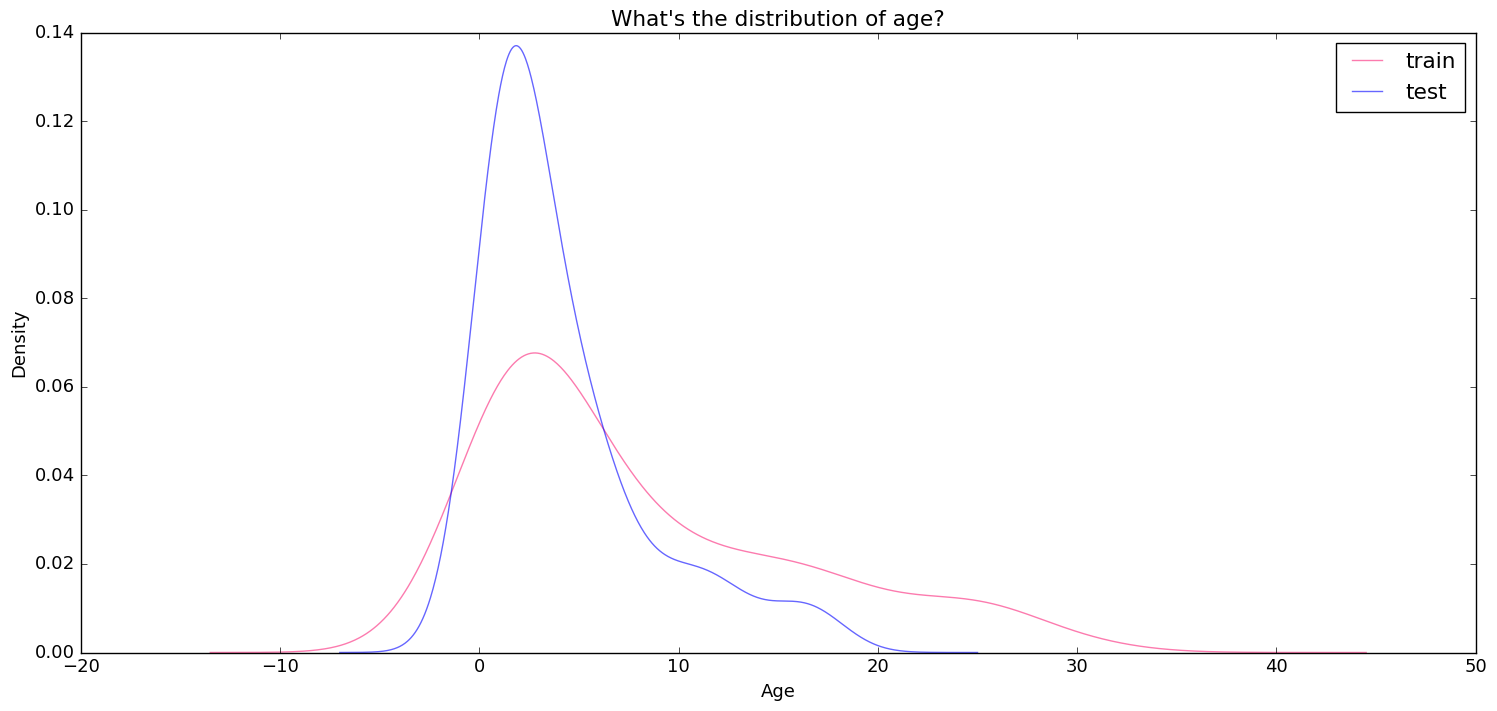

In [5]:
#age sex pclass
plt.rc("font",size=13)
fig=plt.figure(figsize=(18,8))
alpha=0.6
#连续变量，用概率密度函数表现数据特征
#离散变量，用直方图表现数据特征

ax1=plt.subplot()
train.Age.value_counts().plot(kind="kde",color="#FA2379",label="train",alpha=alpha)
test.Age.value_counts().plot(kind="kde",label="test",alpha=alpha)
ax1.set_xlabel("Age")
ax1.set_title("What's the distribution of age?")
plt.legend(loc="best")


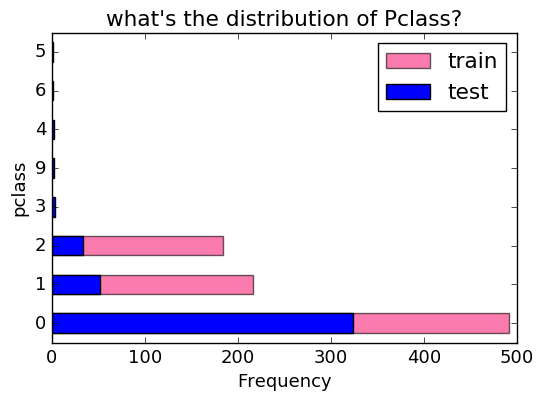

In [6]:
ax2=plt.subplot()
train.Pclass.value_counts().plot(kind="barh",color="#FA2379",label="train",alpha=alpha)
test.Parch.value_counts().plot(kind="barh",label="test")
ax2.set_ylabel("pclass")
ax2.set_xlabel("Frequency")
ax2.set_title("what's the distribution of Pclass?")
plt.legend(loc="best")

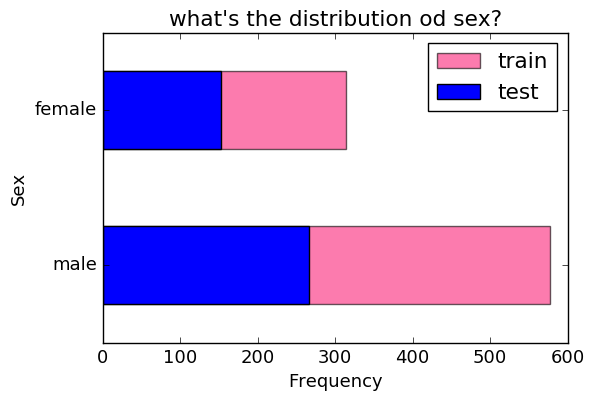

In [7]:
ax3=plt.subplot()
train.Sex.value_counts().plot(kind="barh",color="#FA2379",label="train",alpha=alpha)
test.Sex.value_counts().plot(kind="barh",label="test")
ax3.set_ylabel("Sex")
ax3.set_xlabel("Frequency")
ax3.set_title("what's the distribution od sex?")
ax3.legend(loc="best")

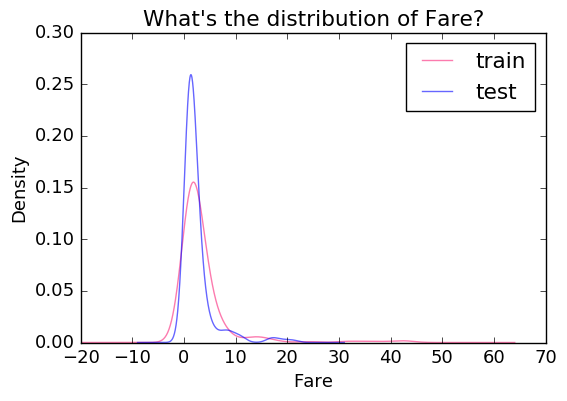

In [8]:
ax4 = plt.subplot()
train.Fare.value_counts().plot(kind='kde', color='#FA2379', label='train', alpha=alpha)
test.Fare.value_counts().plot(kind='kde', label='test', alpha=alpha)
ax4.set_xlabel('Fare')
ax4.set_title("What's the distribution of Fare?" )
plt.legend(loc='best')

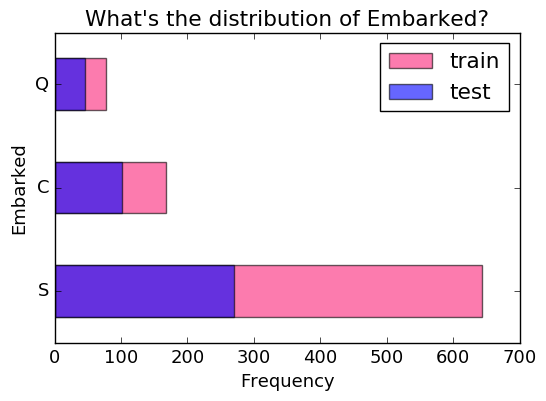

In [9]:
ax5 = plt.subplot()
train.Embarked.value_counts().plot(kind='barh', color='#FA2379', label='train', alpha=alpha)
test.Embarked.value_counts().plot(kind='barh', label='test', alpha=alpha)
ax5.set_ylabel('Embarked')
ax5.set_xlabel('Frequency')
ax5.set_title("What's the distribution of Embarked?" )
plt.legend(loc='best')

In [10]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

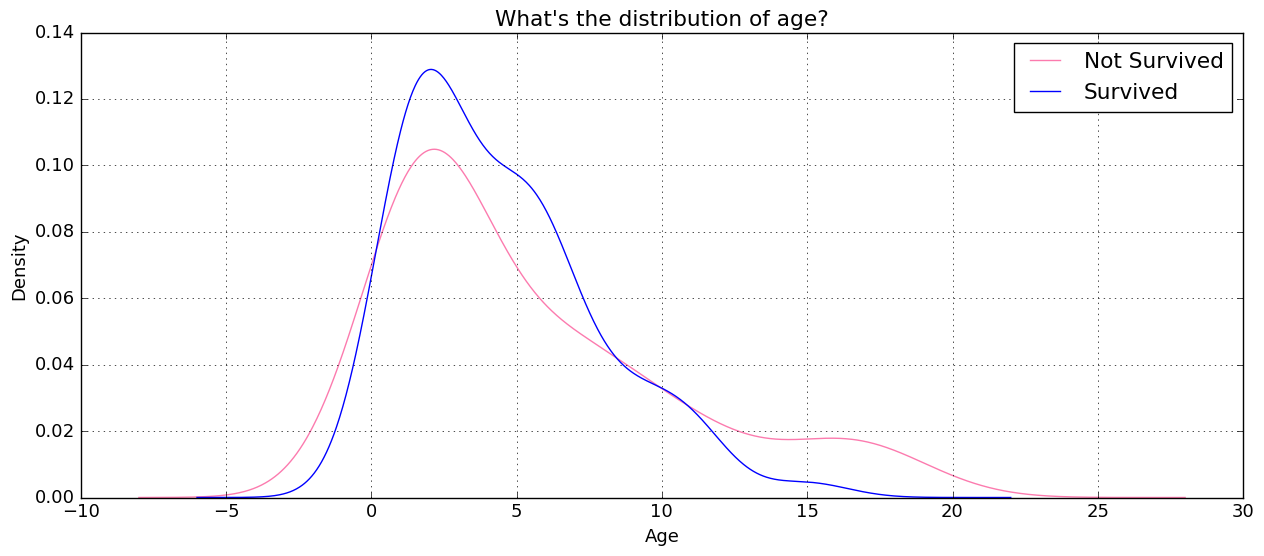

In [11]:
#look closely to the train data
fig=plt.figure(figsize=(15,6))
train[train.Survived==0].Age.value_counts().plot(kind="density",color="#FA2379",label="Not Survived",alpha=alpha)
train[train.Survived==1].Age.value_counts().plot(kind="density",label="Survived")
plt.xlabel("Age")
plt.title("What's the distribution of age?")
plt.legend(loc="best")
plt.grid()

In [12]:
df_male=train[train.Sex=="male"].Survived.value_counts().sort_index()
df_female=train[train.Sex=="female"].Survived.value_counts().sort_index()

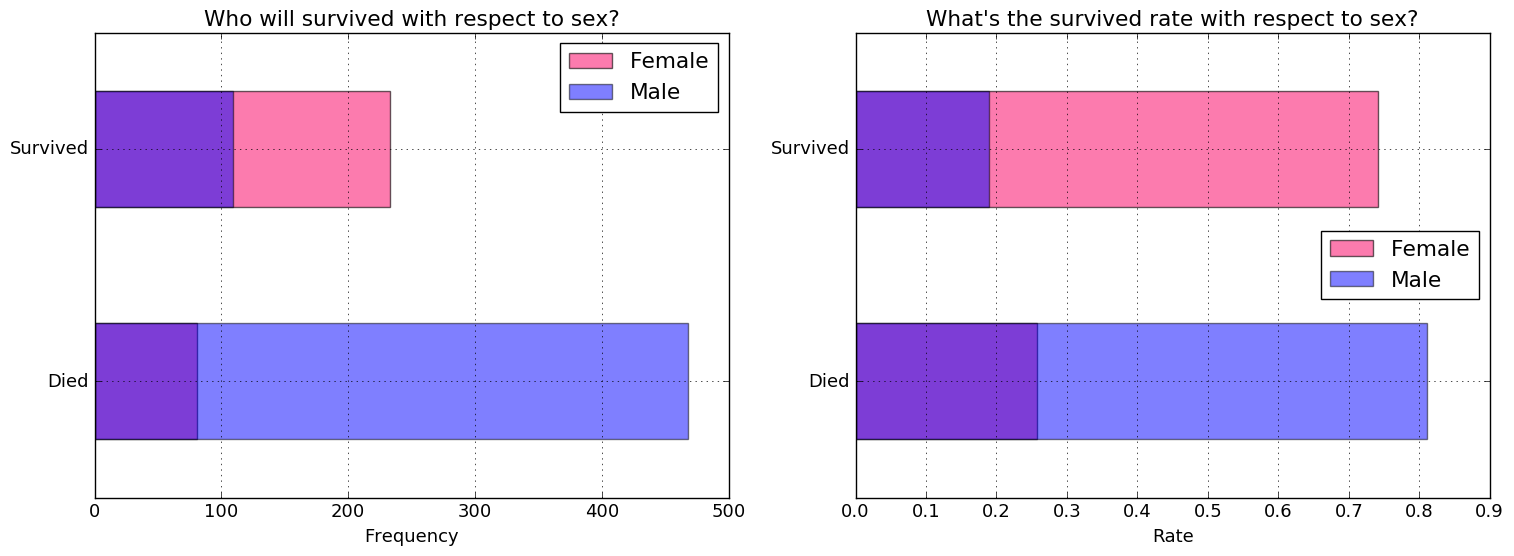

In [13]:
fig=plt.figure(figsize=(18,6))
ax1=plt.subplot2grid((1,2),(0,0))
df_female.plot(kind='barh', color='#FA2379', label='Female', alpha=alpha)
df_male.plot(kind='barh', label='Male', alpha=alpha-0.1)
ax1.set_xlabel('Frequency')
ax1.set_yticklabels(['Died', 'Survived'])
ax1.set_title("Who will survived with respect to sex?" )
plt.legend(loc='best')
plt.grid()

ax2 = plt.subplot2grid((1,2), (0,1))
(df_female/train[train.Sex=='female'].shape[0]).plot(kind='barh', color='#FA2379', label='Female', alpha=alpha)
(df_male/train[train.Sex=='male'].shape[0]).plot(kind='barh', label='Male', alpha=alpha-0.1)
ax2.set_xlabel('Rate')
ax2.set_yticklabels(['Died', 'Survived'])
ax2.set_title("What's the survived rate with respect to sex?" )
plt.legend(loc='best')
plt.grid()

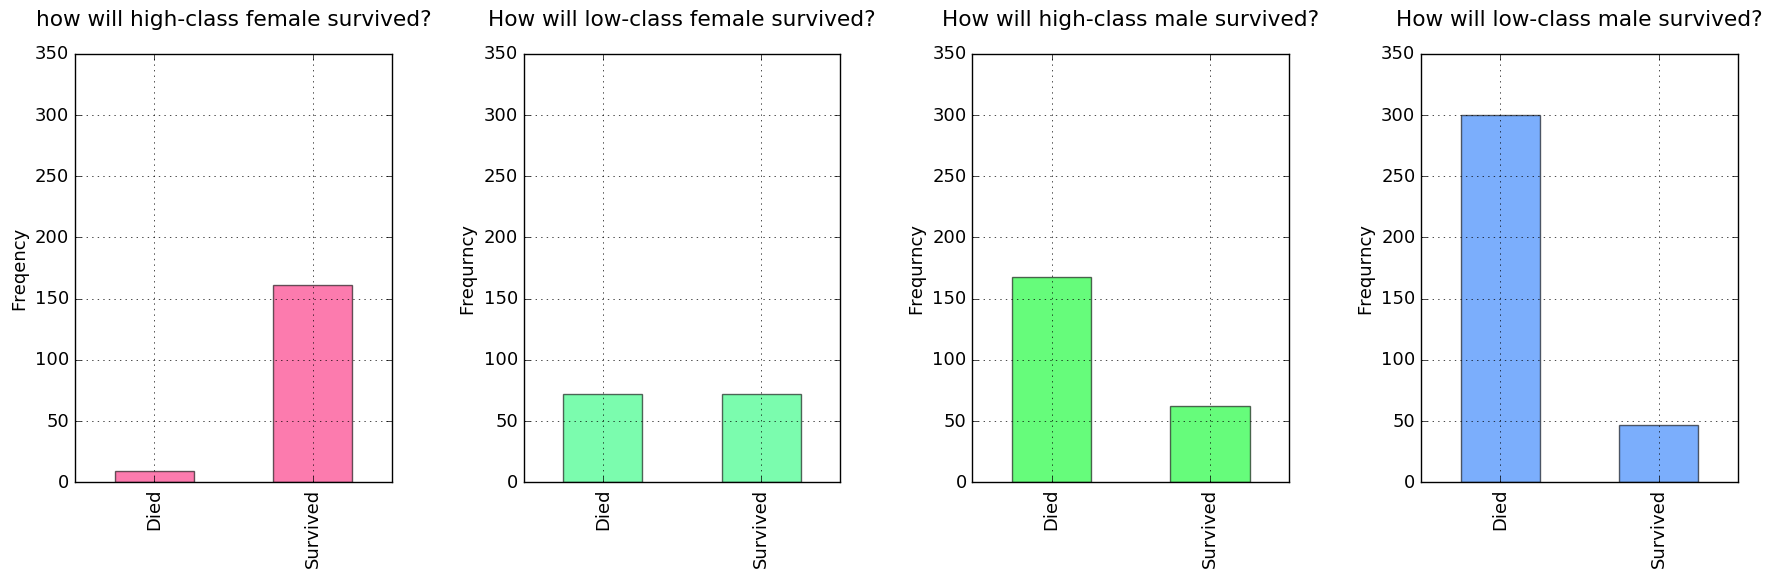

In [14]:
df_male=train[train.Sex=="male"]
df_female=train[train.Sex=="female"]
fig=plt.figure(figsize=(18,6))
ax1=plt.subplot2grid((1,4),(0,0))
df_female[df_female.Pclass<3].Survived.value_counts().sort_index().plot(kind="bar",color="#FA2379",alpha=alpha)
ax1.set_ylabel("Freqency")
ax1.set_ylim((0,350))
ax1.set_xticklabels(["Died","Survived"])
ax1.set_title("how will high-class female survived?",y=1.05)
plt.grid()

ax2 = plt.subplot2grid((1,4), (0,1))
df_female[df_female.Pclass==3].Survived.value_counts().sort_index().plot(kind='bar', color='#23FA79', alpha=alpha)
ax2.set_ylabel('Frequrncy')
ax2.set_ylim((0,350))
ax2.set_xticklabels(['Died', 'Survived'])
ax2.set_title("How will low-class female survived?", y=1.05)
plt.grid()

ax3 = plt.subplot2grid((1,4), (0,2))
df_male[df_male.Pclass<3].Survived.value_counts().sort_index().plot(kind='bar', color='#00FA23', alpha=alpha)
ax3.set_ylabel('Frequrncy')
ax3.set_ylim((0,350))
ax3.set_xticklabels(['Died', 'Survived'])
ax3.set_title("How will high-class male survived?", y=1.05)
plt.grid()

ax4 = plt.subplot2grid((1,4), (0,3))
df_male[df_male.Pclass==3].Survived.value_counts().sort_index().plot(kind='bar', color='#2379FA', alpha=alpha)
ax4.set_ylabel('Frequrncy')
ax4.set_ylim((0,350))
ax4.set_xticklabels(['Died', 'Survived'])
ax4.set_title("How will low-class male survived?", y=1.05)
plt.grid()
plt.tight_layout()

In [15]:
train[train.Ticket=='1601'].shape

(7, 12)

In [16]:
train[train.Ticket=='CA 2144'].shape

(6, 12)

In [17]:
#data cleaning
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

,Fare,Pclass,Embarked
61,80.0,1,NaN
829,80.0,1,NaN


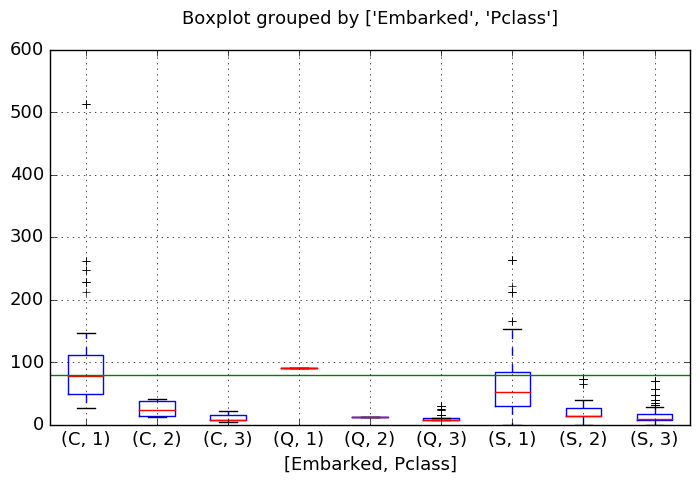

In [19]:
#missing value on embarked, assuming that is related with fare and pclass
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111)
ax=train.boxplot(column="Fare",by=["Embarked","Pclass"],ax=ax)
plt.axhline(y=80,color="green")
ax.set_title("",y=1.1)

train[train.Embarked.isnull()][["Fare","Pclass","Embarked"]]

In [20]:
train["Embarked"]=train["Embarked"].fillna("C");

,Pclass,Fare,Embarked
152,3,NaN,S


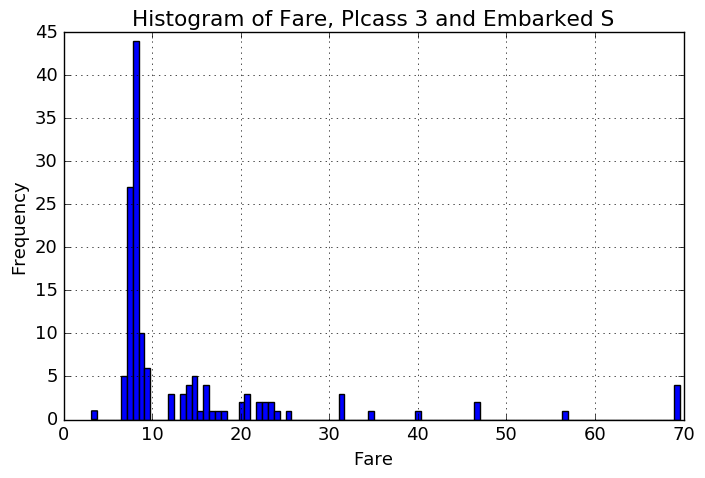

In [21]:
#missing value on fare
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
test[(test.Pclass==3)&(test.Embarked=='S')].Fare.hist(bins=100, ax=ax)

plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Fare, Plcass 3 and Embarked S')
test[test.Fare.isnull()][['Pclass', 'Fare', 'Embarked']]

In [22]:
test[(test.Pclass==3)&(test.Embarked=="S")].Fare.value_counts().head()

8.0500    17
7.8958    10
7.7750    10
7.8542     8
8.6625     8
Name: Fare, dtype: int64

In [23]:
test.Fare.fillna(8.05,inplace=True)

In [24]:
#missing value of cabin with UO
full=pd.concat([train,test],ignore_index=True)
full.Cabin.fillna("UO",inplace=True)

In [25]:
#feature engineering
import re
names=full.Name.map(lambda x:len(re.split(' ',x)))
_=full.set_value(full.index,"Names",names)
del names

In [26]:
title=full.Name.map(lambda x:re.compile(', (.*?)\.').findall(x)[0])
title[title=="Mme"]="Mrs"
title[title.isin(['Ms','Mlle'])] = 'Miss'
title[title.isin(['Don', 'Jonkheer'])] = 'Sir'
title[title.isin(['Dona', 'Lady', 'the Countess'])] = 'Lady'
title[title.isin(['Capt', 'Col', 'Major', 'Dr', 'Officer', 'Rev'])] = 'Officer'
full.set_value(full.index,"Title",title)
del title

In [27]:
deck=full[~full.Cabin.isnull()].Cabin.map(lambda x:re.compile("([a-zA-Z]+)").search(x).group())
deck=pd.factorize(deck)[0]
_=full.set_value(full.index,"Deck",deck)

In [28]:
checker=re.compile("([0-9]+)")
def roomNum(x):
    nums=checker.search(x)
    if nums:
        return int(nums.group())+1
    else:
        return 1
    
rooms=full.Cabin.map(roomNum)
full.set_value(full.index,"Room",rooms)
full["Room"]=full.Room/full.Room.sum()

In [29]:
full["Group_num"]=full.Parch+full.SibSp+1

In [30]:
full["Group_size"]=pd.Series("M",index=full.index)
_=full.set_value(full.Group_num>4,"Group_size","L")
_=full.set_value(full.Group_num==1,"Group_size","S")


In [31]:
#normalized the fare
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
full["NorFare"]=pd.Series(scaler.fit_transform(full.Fare.reshape(-1,1)).reshape(-1),index=full.index)

In [32]:
def setValue(col):
    _=train.set_value(train.index,col,full[:891][col].values)
    _=test.set_value(test.index,col,full[891:][col].values)
    
for col in ['Deck', 'Room', 'Group_size', 'Group_num', 'Names', 'Title']:
    setValue(col)

In [33]:
#predict age
full.drop(labels=['PassengerId', 'Name', 'Cabin', 'Survived', 'Ticket', 'Fare'],axis=1,inplace=True)
full=pd.get_dummies(full,columns=["Embarked","Sex","Title","Group_size"])

In [34]:
 #question 1-- 按照选定的伪随机数方法对数据集进行随机抽样
from sklearn.model_selection import train_test_split
X=full[~full.Age.isnull()].drop("Age",axis=1)
y = full[~full.Age.isnull()].Age
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)


In [35]:
#question 2 -- 计算平均绝对回归误差，--从损失函数中得分
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import make_scorer
def get_model(estimator,parameters,X_train,y_train,scoring):
    #gridsearchCV -- 对估计器的指定参数值进行详尽搜索。
    model=GridSearchCV(estimator,param_grid=parameters,scoring=scoring)
    model.fit(X_train,y_train)
    return model.best_estimator_

xgboost model引入失败，代码如下所示
import xgboost as xgb

XGB = xgb.XGBRegressor(max_depth=4, seed= 42)
scoring = make_scorer(mean_absolute_error, greater_is_better=False)
parameters = {'reg_alpha':np.linspace(0.1,1.0,5), 'reg_lambda': np.linspace(1.0,3.0,5)}
reg_xgb = get_model(XGB, parameters, X_train, y_train, scoring)
print (reg_xgb)
print ("Mean absolute error of test data: {}".format(mean_absolute_error(y_test, reg_xgb.predict(X_test))))

fig = plt.figure(figsize=(15, 6))
alpha = 0.5
full.Age.value_counts().plot(kind='density', color='#FA2379', label='Before', alpha=alpha)

pred = reg_xgb.predict(full[full.Age.isnull()].drop('Age', axis=1))
full.set_value(full.Age.isnull(), 'Age', pred)

full.Age.value_counts().plot(kind='density', label='After', alpha=alpha)
plt.xlabel('Age')
plt.title("What's the distribution of Age after predicting?" )
plt.legend(loc='best')
plt.grid()

In [36]:
full.Age.fillna(10,inplace=True)
full["NorAge"]=pd.Series(scaler.fit_transform(full.Age.reshape(-1,1)).reshape(-1),index=full.index)
full["NorNames"]=pd.Series(scaler.fit_transform(full.Names.reshape(-1,1)).reshape(-1),index=full.index)
full['Group_num'] = pd.Series(scaler.fit_transform(full.Group_num.reshape(-1,1)).reshape(-1), index=full.index)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [37]:
for col in ['NorAge', 'NorFare', 'NorNames', 'Group_num']:
    setValue(col)

In [38]:
train.Sex=np.where(train.Sex=="female",0,1)
test.Sex=np.where(test.Sex=="female",0,1)

In [39]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Deck,Room,Group_size,Group_num,Names,Title,NorAge,NorFare,NorNames
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,S,0,0.000064,M,0.073352,4,Mr,-0.256667,-0.503176,-0.075501
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,C,1,0.005496,M,0.073352,7,Mrs,0.799932,0.734809,2.458619


In [40]:
train.drop(labels=['PassengerId', 'Name', 'Names', 'Cabin', 'Ticket', 'Age', 'Fare'], axis=1, inplace=True)
test.drop(labels=['Name', 'Names', 'Cabin', 'Ticket', 'Age', 'Fare'], axis=1, inplace=True)

train = pd.get_dummies(train, columns=['Embarked', 'Pclass', 'Title', 'Group_size'])
test = pd.get_dummies(test, columns=['Embarked', 'Pclass', 'Title', 'Group_size'])
test['Title_Sir'] = pd.Series(0, index=test.index)

In [41]:
pd.Series(list('abcaa'))

0    a
1    b
2    c
3    a
4    a
dtype: object

In [42]:
pd.get_dummies(pd.Series(list('abcaa')))

,a,b,c
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [43]:
train.head(3)

,Survived,Sex,SibSp,Parch,Deck,Room,Group_num,NorAge,NorFare,NorNames,...,Title_Lady,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Sir,Group_size_L,Group_size_M,Group_size_S
0,0,1,1,0,0,0.000064,0.073352,-0.256667,-0.503176,-0.075501,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,1,0,1,0.005496,0.073352,0.799932,0.734809,2.458619,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0,0,0,0.000064,-0.558346,0.007483,-0.490126,-0.920208,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [58]:
#build model
 #question 3 --  确定不同训练集大小的交叉验证训练和得分
    #这是一个工具，通过添加更多的训练数据以及估计量是否从方差误差或偏差误差中受益更多
from sklearn.model_selection import learning_curve 
def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,
                       n_jobs=1,train_sizes=np.linspace(.1,1.0,5),scoring="accuracy"):
    plt.figure(figsize=(10,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    train_sizes,train_scores,test_scores=learning_curve(estimator,X,y,cv=cv,scoring=scoring,
                                                       n_jobs=n_jobs,train_sizes=train_sizes)
    train_scores_mean=np.mean(train_scores,axis=1)
    train_scores_std=np.std(train_scores,axis=1)
    test_scores_mean=np.mean(test_scores,axis=1)
    test_scores_std=np.std(test_scores,axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes,train_scores_mean-train_scores_std,
                    train_scores_mean+train_scores_std,alpha=0.2,color="r")
    
    plt.fill_between(train_sizes,test_scores_mean-test_scores_std,
                    test_scores_mean+test_scores_std,alpha=0.1,color="g")
    
    plt.plot(train_sizes,train_scores_mean,"o-",color="r",label="Training score")
    plt.plot(train_sizes,test_scores_mean,"o-",color="g",label="Cross_validation score")
    
    plt.legend(loc="best")
    
    return plt


In [45]:
from sklearn.metrics import roc_curve,auc  #question 4
def plot_roc_curve(estimator,X,y,title):
    fpr,tpr,_=roc_curve(y,estimator.predict_proba(X)[:,1])
    
    roc_auc=auc(fpr,tpr)
    print("ROC AUC:%0.2f" %roc_auc)
    
    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="Roc curve (area=%0.2f)" %roc_auc)
    plt.plot([0,1],[0,1],"k--")
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False positive rate")
    plt.ylabel("Trur positive rate")
    plt.title("roc curve- {}".format(title))
    plt.legend(loc="lower right")
    plt.show()
    

In [46]:
X=train.drop(["Survived"],axis=1)
y=train.Survived
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)


In [48]:
from sklearn.metrics import accuracy_score
scoring=make_scorer(accuracy_score,greater_is_better=True)


In [52]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(weights="uniform")
parameters={"n_neighbors":[3,4,5],"p":[1,2]}
clf_knn=get_model(KNN,parameters,X_train,y_train,scoring)

0.811659192825
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='uniform')


<module 'matplotlib.pyplot' from 'D:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

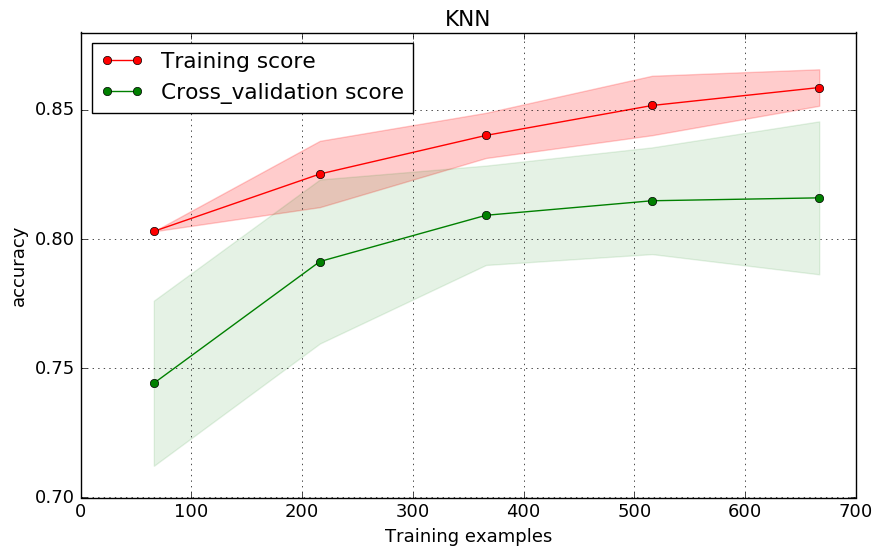

In [59]:
print(accuracy_score(y_test,clf_knn.predict(X_test)))
print(clf_knn)
plot_learning_curve(clf_knn,"KNN",X,y,cv=4)

In [63]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42,criterion="entropy",min_samples_split=5,oob_score=True)
parameters={"n_estimators":[500],"min_samples_leaf":[12]}
clf_rfc1=get_model(rfc,parameters,X_train,y_train,scoring)

0.829596412556
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=12,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=True, random_state=42,
            verbose=0, warm_start=False)


<module 'matplotlib.pyplot' from 'D:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

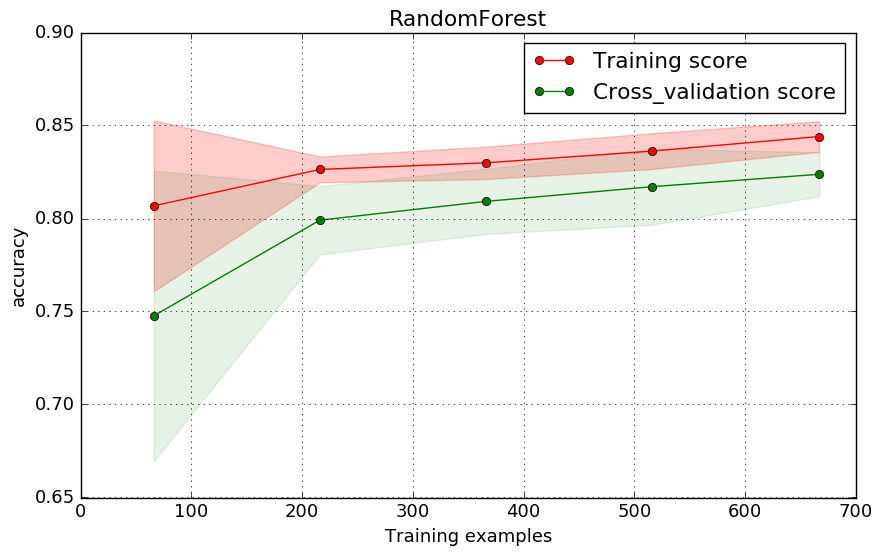

In [66]:
print(accuracy_score(y_test,clf_rfc1.predict(X_test)))
print(clf_rfc1)
plot_learning_curve(clf_rfc1,"RandomForest",X,y,cv=4)

([<matplotlib.axis.XTick at 0xc2de748>,
 <a list of 10 Text xticklabel objects>)

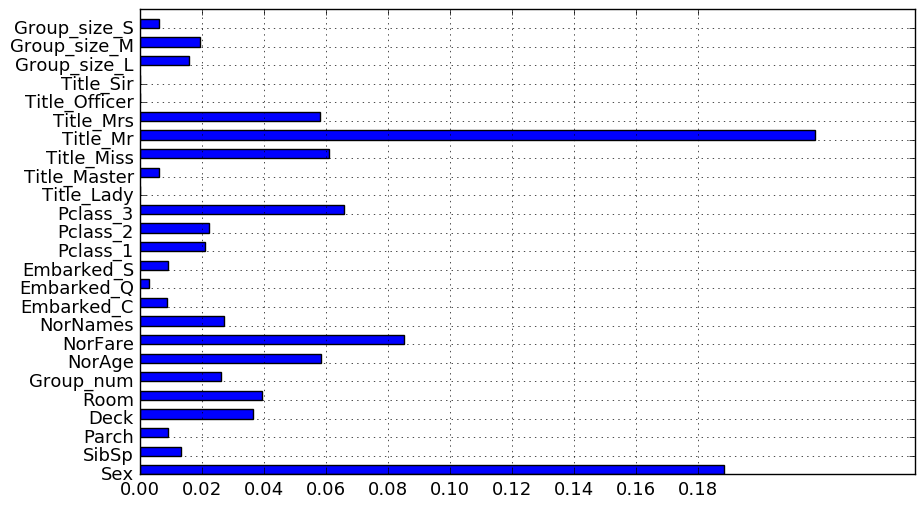

In [67]:
plt.figure(figsize=(10,6))
plt.barh(np.arange(X_train.columns.shape[0]),clf_rfc1.feature_importances_,0.5)
plt.yticks(np.arange(X_train.columns.shape[0]),X_train.columns)
plt.grid()
plt.xticks(np.arange(0,0.2,0.02))

In [68]:
cols=X_train.columns[clf_rfc1.feature_importances_>=0.016]

In [70]:
rfc=RandomForestClassifier(random_state=42,criterion="entropy",min_samples_split=5,oob_score=True)
parameters={"n_estimators":[500],"min_samples_leaf":[12]}
clf_rfc2=get_model(rfc,parameters,X_train[cols],y_train,scoring)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=12,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=True, random_state=42,
            verbose=0, warm_start=False)
0.825112107623


<module 'matplotlib.pyplot' from 'D:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

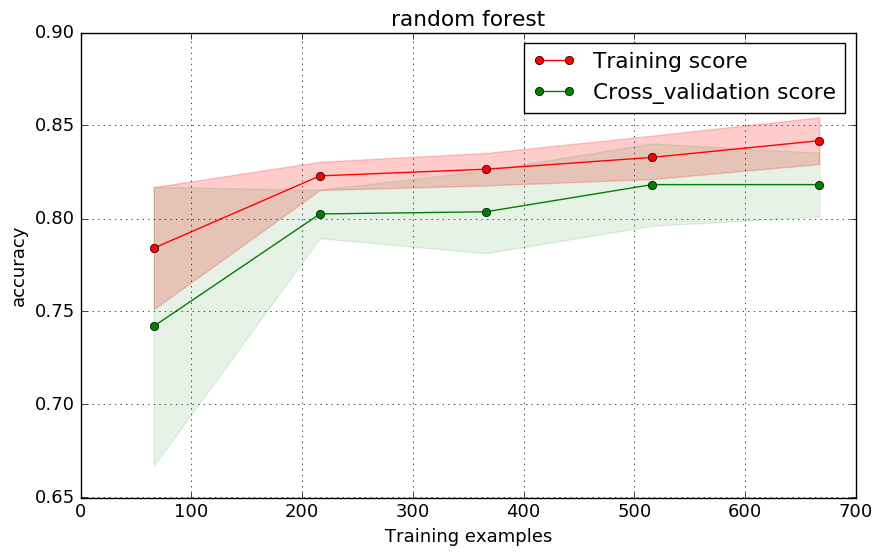

In [71]:
print(clf_rfc2)
print(accuracy_score(y_test,clf_rfc2.predict(X_test[cols])))
plot_learning_curve(clf_rfc2,"random forest",X[cols],y,cv=4)

#ensemble
#question 5 -- 综合各分类器优点训练
#表决分类器实现背后的想法是将概念上不同的机器学习分类器结合起来
并使用多数投票或平均预测概率（软投票）来预测类标签。
这样的分类器可以用于一组性能良好的模型，以便平衡其各自的弱点。

In [73]:
from sklearn.ensemble import VotingClassifier  
clf_vc=VotingClassifier(estimators=[("rfc1",clf_rfc1),("rfc2",clf_rfc2),("knn",clf_knn)],
                       voting="hard",weights=[1,1,2])
clf_vc=clf_vc.fit(X_train,y_train)

0.825112107623
VotingClassifier(estimators=[('rfc1', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=12,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
        ...owski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='uniform'))],
         n_jobs=1, voting='hard', weights=[1, 1, 2])


<module 'matplotlib.pyplot' from 'D:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

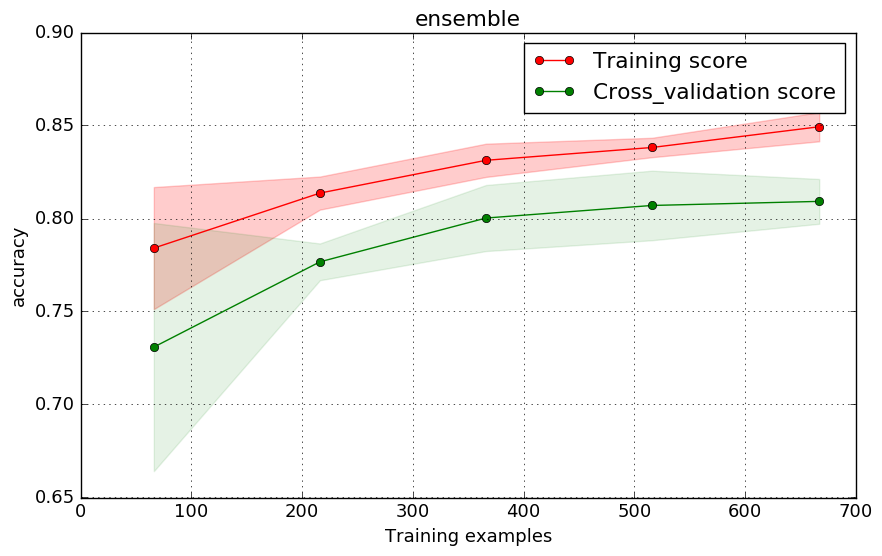

In [74]:
print(accuracy_score(y_test,clf_vc.predict(X_test)))
print(clf_vc)
plot_learning_curve(clf_vc,"ensemble",X,y,cv=4)